In [1]:
import numpy as np
from scipy.special import gamma, zeta
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d

def absFunc_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
    # re and im are  tuples, re=(a, b) and im=(c, d), defining the rectangular region
    # N is the number of discrete points per unit interval 
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return x,y,np.abs(f(z)), np.angle(f(z))

def func_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
    # re and im are  tuples, re=(a, b) and im=(c, d), defining the rectangular region
    # N is the number of discrete points per unit interval 
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return f(z) 

def perfract(x, t, m, M):
    x = x / t
    return m + (M-m) * (x-np.floor(x))

def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

def domaincol_co(w,s):
    H = Hcomplex(w) 
    m = 0.7 # brightness is restricted to [0.7,1]; interval suggested by E Wegert
    M = 1
    n = 15 # n=number of isochromatic lines per cycle 
    isol = perfract(H, 1.0/n, m, M) # isochromatic lines
    modul = np.absolute(w)
    logm = np.log(modul)
    logm = np.nan_to_num(logm) 
    modc = perfract(logm, 2*np.pi/n, m, M) # lines of constant log-modulus
   
    V = modc * isol 
    S = 0.9 * np.ones_like(H, float) 
    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
   
    return RGB

def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], title='',
                s=0.9, N=200, daxis=None):
    w = func_vals(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

In [20]:
def plotFunction(g):
    plt.rcParams['figure.figsize'] = 10, 5
    ab = (-4, 4)
    cd = (-2, 2)
    plt.subplot(1, 2, 1)
    plot_domain(domaincol_co,  g, re=ab, im=cd, daxis=True)

    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121, projection='3d')
    X,Y,Z,phase = absFunc_vals(g, ab, cd,  20)
    surf1 = ax1.plot_surface(X, Y, Z)
    ax1.set_zlim(0,10)

    ct1 = fig.add_subplot(122)
    ct1 = plt.contour(X, Y, phase, [i*np.pi/2 for i in range(-2,2,1)], colors='black')
    plt.clabel(ct1, inline=True, fontsize=8)
    plt.imshow(phase, extent=[ab[0], ab[1], cd[0], cd[1]], origin='lower',cmap='RdGy', alpha=0.5)
    plt.colorbar();
    return

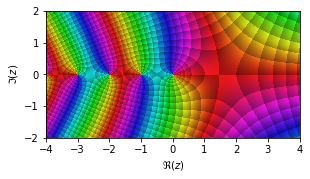

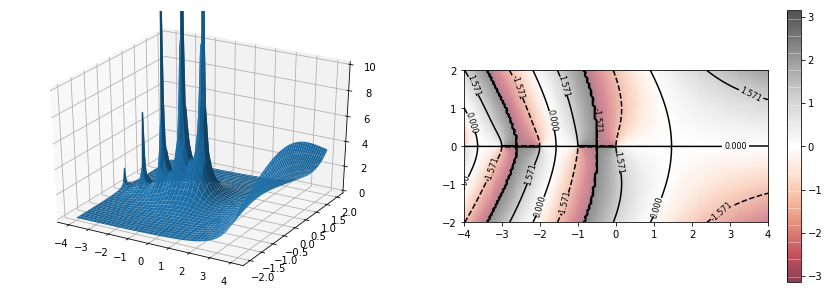

In [21]:
g=lambda z:gamma(z)
plotFunction(g)

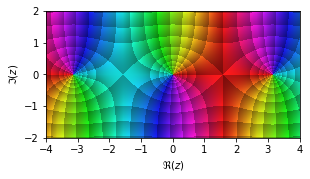

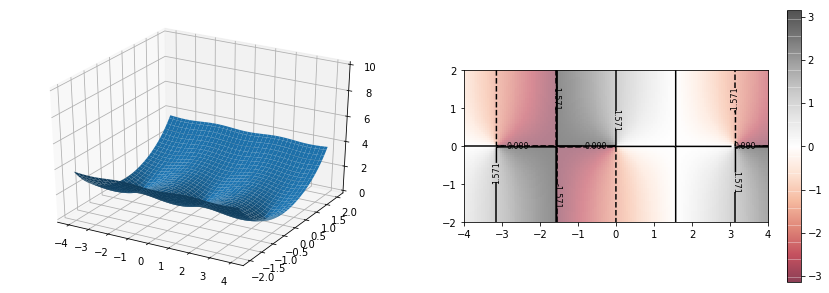

In [22]:
g=lambda z:np.sin(z)
plotFunction(g)

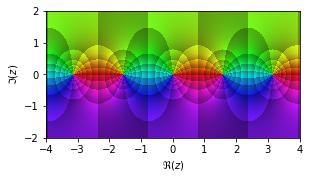

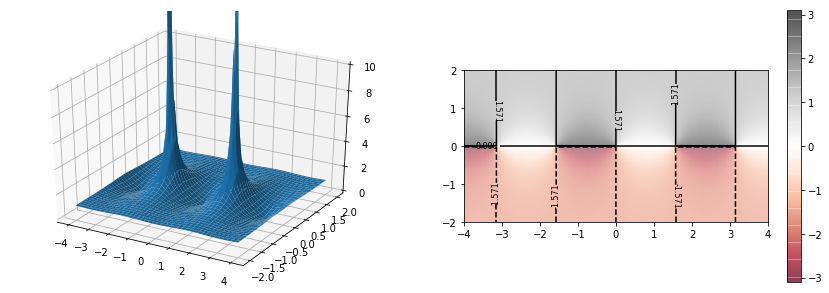

In [23]:
g=lambda z:np.tan(z)
plotFunction(g)

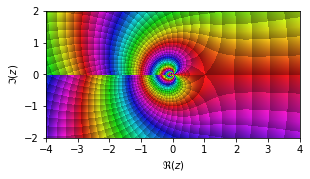

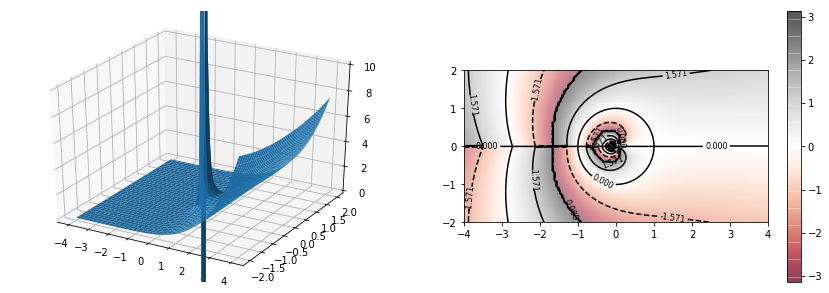

In [24]:
g=lambda z:np.power(z,np.log(z))
plotFunction(g)